In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
import seaborn as sb
warnings.filterwarnings('ignore')


from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

os.chdir('c://users//administrator//desktop/Projects/Amazon Videos Games/')

In [ ]:
## REAL AMAZON DATA !!

In [2]:
am_vg = pd.read_csv('ratings_Video_Games.csv',header = None,names=['user','item','rating','timestamp'])
am_vg.shape

(1324753, 4)

In [3]:
am_vg.head(2)

,user,item,rating,timestamp
0,AB9S9279OZ3QO,0078764343,5.0,1373155200
1,A24SSUT5CSW8BH,0078764343,5.0,1377302400


In [4]:
am_vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324753 entries, 0 to 1324752
Data columns (total 4 columns):
user         1324753 non-null object
item         1324753 non-null object
rating       1324753 non-null float64
timestamp    1324753 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 40.4+ MB


In [13]:
v1 = am_vg.head(100000).pivot('user','item','rating').fillna(0)

In [15]:
v1.head()

item,0078764343,043933702X,0439339960,0439339987,0439342260,0439374391,0439394422,043940133X,0439573947,0439591295,...,B00005NZTM,B00005NZTS,B00005NZUO,B00005O0I2,B00005O0I3,B00005O0I4,B00005O0I5,B00005O0I7,B00005O0I8,B00005O0I9
user,,,,,,,,,,,,,,,,,,,,,
A00101961G0VS92WDGJ11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A005481137I9SCAWEF7ON,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A00984952ZA5655QIVYDL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A01007512W8LIXGVKI7HZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A01216171YWQSRTRHU4H9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#from scipy.sparse import csr_matrix                ## CRASHED MY PC! XD

#user_u = list(sorted(am_vg.user.unique()))
#item_u = list(sorted(am_vg.item.unique()))

#row = am_vg.user.astype('category', categories=user_u).cat.codes
#col = am_vg.item.astype('category', categories=item_u).cat.codes

#data = am_vg['rating'].tolist()

#sparse_matrix = csr_matrix((data, (row, col)), shape=(len(user_u), len(item_u)))

#df = pd.SparseDataFrame([ pd.SparseSeries(sparse_matrix[i].toarray().ravel(), fill_value=0) 
                            #  for i in np.arange(sparse_matrix.shape[0]) ], 
                       #index=user_u, columns=item_u, default_fill_value=0)

In [8]:
from scipy.sparse import csr_matrix

v1cs = csr_matrix(v1.values)      ## caonvering it into np array
v1cs               ## BOOK PIVOT MATRIX

<67486x6541 sparse matrix of type '<class 'numpy.float64'>'
	with 100000 stored elements in Compressed Sparse Row format>

In [10]:
from sklearn.neighbors import NearestNeighbors

knn_cosine = NearestNeighbors(metric='cosine',algorithm='brute')

knn_cosine.fit(v1cs)            #  knn_cosine.fit(bp)  can do this also

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [16]:
v1.iloc[0,:].reshape(1,-1)

array([[0., 0., 0., ..., 0., 0., 0.]])

In [17]:
distances,indices = knn_cosine.kneighbors(v1.iloc[0,:].reshape(1,-1), n_neighbors= 6)

In [18]:
indices

array([[60292,  6633, 35173, 50321, 39360, 50841]], dtype=int64)

In [23]:
v1.index[indices]

Index([['ALVHZGDE9UYNZ', 'A1D6S2G90CIJB2', 'A2ZBXKLN9U2CCH', 'A3TWANOXPU6UA8', 'A37OO54ZURFOYF', 'A3V2LGAABSL6UM']], dtype='object', name='user')

# LOADING JASON

In [3]:
v2 = pd.read_json('Video_Games_5.json',lines=True)

In [4]:
v2.shape

(231780, 9)

In [28]:
v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231780 entries, 0 to 231779
Data columns (total 9 columns):
asin              231780 non-null object
helpful           231780 non-null object
overall           231780 non-null int64
reviewText        231780 non-null object
reviewTime        231780 non-null object
reviewerID        231780 non-null object
reviewerName      228967 non-null object
summary           231780 non-null object
unixReviewTime    231780 non-null int64
dtypes: int64(2), object(7)
memory usage: 15.9+ MB


In [30]:
v2.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0700099867,"[8, 12]",1,Installing the game was a struggle (because of...,"07 9, 2012",A2HD75EMZR8QLN,123,Pay to unlock content? I don't think so.,1341792000
1,0700099867,"[0, 0]",4,If you like rally cars get this game you will ...,"06 30, 2013",A3UR8NLLY1ZHCX,"Alejandro Henao ""Electronic Junky""",Good rally game,1372550400
2,0700099867,"[0, 0]",1,1st shipment received a book instead of the ga...,"06 28, 2014",A1INA0F5CWW3J4,"Amazon Shopper ""Mr.Repsol""",Wrong key,1403913600
3,0700099867,"[7, 10]",3,"I got this version instead of the PS3 version,...","09 14, 2011",A1DLMTOTHQ4AST,ampgreen,"awesome game, if it did not crash frequently !!",1315958400
4,0700099867,"[2, 2]",4,I had Dirt 2 on Xbox 360 and it was an okay ga...,"06 14, 2011",A361M14PU2GUEG,"Angry Ryan ""Ryan A. Forrest""",DIRT 3,1308009600


In [6]:
v2.columns = ['ItemId','helpfulness','Rating','Reviewtxt','reviewTime','UserId','Username','ReviewHead','Timestamp']

In [19]:
v2[v2['Username'].isna()]

,ItemId,helpfulness,Rating,Reviewtxt,reviewTime,UserId,Username,ReviewHead,Timestamp
78,9861019731,"[0, 0]",5,It works perfectly! Nothing is wrong with it.,"07 13, 2014",A26HSO6VAFB2V4,NaN,Perfect!,1405209600
831,B00000F1GM,"[3, 3]",5,For those of you who haven't played Super Mari...,"01 10, 2013",A2WTO0ST2SUUY9,NaN,Super Mario 64 Review,1357776000
1007,B00000I1BF,"[0, 0]",5,classic game for the ps1. i love it and it sti...,"07 13, 2014",A3OU09O34BC73,NaN,so fun!!,1405209600
1008,B00000I1BF,"[0, 0]",5,I was feeling nostalgic so I bought this game ...,"06 17, 2013",ANLC4FX4QK23V,NaN,Blast from the past!,1371427200
1471,B00000IWYT,"[0, 0]",5,Wow...the only Game Boy games that even come c...,"04 16, 2001",A1OYBF92TASIWN,NaN,"By far, the best Game Boy game ever",987379200
2223,B00000K125,"[0, 0]",5,Buy! Best Graphics on the Dreamcast that I've ...,"07 14, 2014",A29TNXQ1GPRHC4,NaN,Best Graphics on the Dreamcast that I've seen,1405296000
2224,B00000K125,"[0, 0]",5,"Old school, but great fighting.","07 16, 2014",A5OJRIC2F9AL2,NaN,but great fighting.,1405468800
2388,B00000K2G7,"[0, 0]",4,Very great port of a very great game...it cont...,"07 14, 2014",A29TNXQ1GPRHC4,NaN,Very great port of a very great game,1405296000
2739,B00000K4AX,"[3, 3]",5,"The game is amazing. I love Shodan, the plot, ...","10 5, 2012",A1GD1G8XXPRYQ8,NaN,Please make System Shock 2 remastered!,1349395200
2796,B00000K4CC,"[0, 0]",3,Works okay.,"07 16, 2014",A5OJRIC2F9AL2,NaN,Three Stars,1405468800


In [58]:
## GETTING ALL THE USER-IDS WHERE USERNAME IS NULL

userids = v2[v2['Username'].isna()]['UserId'].values
userids[5]

'A29TNXQ1GPRHC4'

In [61]:
## FINDING THE USERNAMES FOR TH RESPECTIVE MISSING USERIDS's FROM OTHER RECORDS
u=[]
for i,id in enumerate(userids):
    username = v2[v2['UserId'] == id]['Username'].values
    try:
        u.append(list(filter(lambda x: x==x,username))[0])
    except:
        u.append('NameMissing')
len(u)

In [84]:
indexes = v2[v2['Username'].isna()].index         ## FINDING THE INDEXES WHERE USERNAME IS NULL

v2.loc[indexes , 'Username'] = u          ## IMPUTING THE CORRECT USERNAMES

In [ ]:
## BUILDING A STANDARD MODEL USING KNEIGHBORS 

In [103]:
v21 = v2[['ItemId','UserId','Rating']]

In [99]:
v2p = v2.pivot('ItemId','UserId','Rating').fillna(0)     ## BUILDING A PIVOT TABLE  ( MOST OF THE VALUES ARE SPARSE)
v2p

UserId,A00263941WP7WCIL7AKWL,A005481137I9SCAWEF7ON,A01588502N52TNG1BP7WG,A01803182IUSFNIFF5984,A023090719X7MTBCLM19B,A0266076X6KPZ6CCHGVS,A034294113MZYOJ6UMXUM,A0380485C177Q6QQNJIX,A03865792TAJESCMLUT0Q,A049511737EMTVGTZXNKV,...,AZYG5R26NUP70,AZYIAWJR9972L,AZYJE40XW6MFG,AZYOVGJLQ03ML,AZYU8M791SIFC,AZZ1KF8RAO1BR,AZZHLZ8H23QD4,AZZKH219IDQGY,AZZNK89PXD006,AZZTC2OYVNE2Q
ItemId,,,,,,,,,,,,,,,,,,,,,
0700099867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6050036071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7100027950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7293000936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8176503290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
907843905X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9625990674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9861019731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9882155456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
from scipy.sparse import csr_matrix                      ## TO STORE A SPARSE MATRIX EFFICIENTLY WE USE csr_matrix

v2pm = csr_matrix(v2p.values)      ## caonvering it into np array
v2pm                            ## BOOK PIVOT MATRIX

<10672x24303 sparse matrix of type '<class 'numpy.float64'>'
	with 231780 stored elements in Compressed Sparse Row format>

In [102]:
from sklearn.neighbors import NearestNeighbors

nn_cosine = NearestNeighbors(metric='cosine',algorithm='brute')      ## ITEM BASED 

nn_cosine.fit(v2pm)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [137]:
nn_cosine?

In [125]:
distances,indices = nn_cosine.kneighbors(v2p.iloc[0,:].reshape(1,-1),n_neighbors=4)
indices,distances

(array([[   0, 6308, 6928, 8069]], dtype=int64),
 array([[0.        , 0.68963954, 0.72501375, 0.76119201]]))

In [118]:
v2p.index[indices]

Index([['0700099867', 'B001TOMR84', 'B002I0JNK8', 'B00488PZ0U']], dtype='object', name='ItemId')

In [121]:
v2p.iloc[0,:].name

'0700099867'

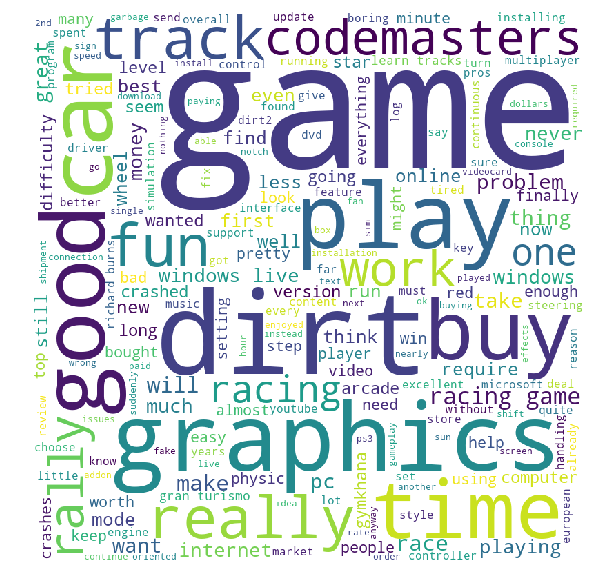

In [133]:
## CREATING WORDCLOUD FROM THE REVIEWS 
## FOR THE GAME WE CHECKED

comment_words = ' '
stopwords = set(STOPWORDS) 

for review in v2[v2['ItemId'] == '0700099867']['Reviewtxt']: 
      
    # split the value 
    tokens = review.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '         ## ALL REVIEWS CONCATNATED
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

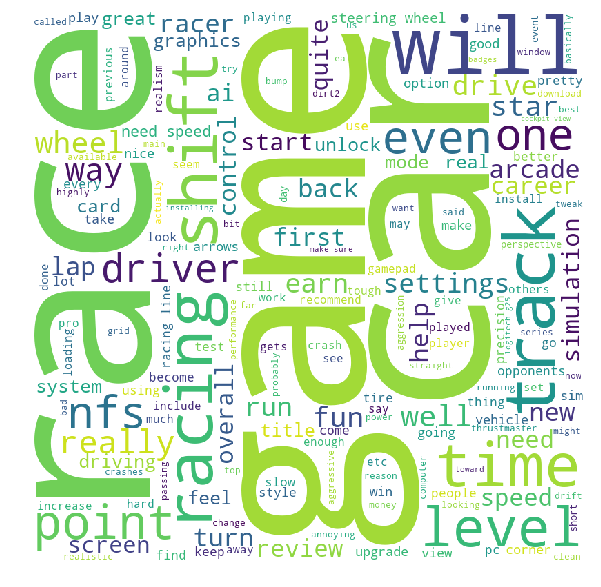

In [132]:
## SIMILAR GAME 1

comment_words = ' '
stopwords = set(STOPWORDS)

for review in v2[v2['ItemId'] == 'B001TOMR84']['Reviewtxt']: 
      
    # split the value 
    tokens = review.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '         ## ALL REVIEWS CONCATNATED
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

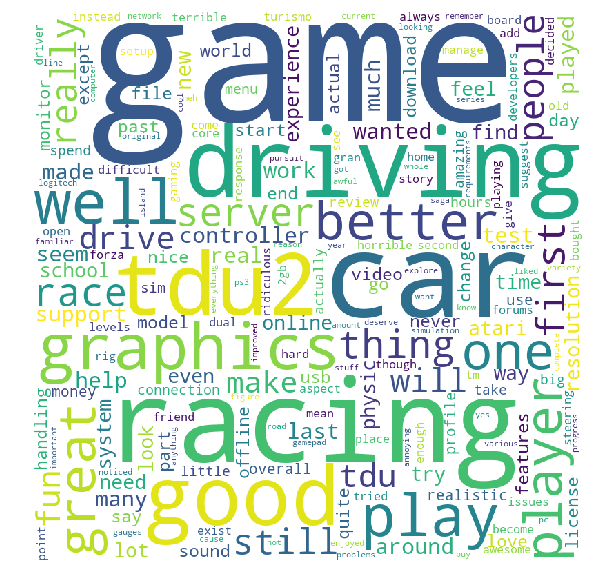

In [136]:
## SIMILAR GAME 2

comment_words = ' '
stopwords = set(STOPWORDS) 

for review in v2[v2['ItemId'] == 'B002I0JNK8']['Reviewtxt']: 
      
    # split the value 
    tokens = review.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '         ## ALL REVIEWS CONCATNATED
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [ ]:
## USER BASED

In [ ]:
## WORD CLOUD OF REVIEW

In [128]:
v2[v2['UserId'] == 'A1VM5Y6BL07X9X']['Reviewtxt'].iloc[0]

"This old school shooter has nice graphics and lots of action. It's similar to, but even more mindless than Plasma Sky. You get bombed by asteroids, abstract looking spaceships, and more asteroids. You have a&nbsp;rechargeable bomb and a rechargeable super weapon. Powerups appear frequently. Don't think, blast away. Don't even try to aim in higher waves. Dodge and blast. And rack up eight digit scores."